In [4]:
import pandas as pd
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams["axes.spines.right"] = False
#plt.rcParams["axes.spines.top"] = False
#plt.rcParams["figure.figsize"] = (4.5, 3.5)

df = pd.read_csv("C:\\Users\\royha\\OneDrive - Hämeen ammattikorkeakoulu\\Python\\BigDataProject\\penguins.csv")


In [5]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [6]:
df["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [7]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [8]:
replacementForSpecies = {
    'Adelie': 0,
    'Gentoo': 1,
    'Chinstrap': 2
}

df["species"] = df["species"].replace(replacementForSpecies)

In [9]:
replacementForIsland = {
    'Torgersen': 0,
    'Biscoe': 1,
    'Dream': 2
}

df["island"] = df["island"].replace(replacementForIsland)

In [10]:
df.shape[0]

344

In [11]:
df = df.dropna(axis=0)
df.shape[0]

333

In [12]:
df.head(15)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,male
1,0,0,39.5,17.4,186.0,3800.0,female
2,0,0,40.3,18.0,195.0,3250.0,female
4,0,0,36.7,19.3,193.0,3450.0,female
5,0,0,39.3,20.6,190.0,3650.0,male
6,0,0,38.9,17.8,181.0,3625.0,female
7,0,0,39.2,19.6,195.0,4675.0,male
12,0,0,41.1,17.6,182.0,3200.0,female
13,0,0,38.6,21.2,191.0,3800.0,male
14,0,0,34.6,21.1,198.0,4400.0,male


In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X = df.drop(['sex'], axis='columns')   #   here we're just dropping the 2 extra columns of infos, so we only have the raw data
y = df.sex

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
len(X_train)   

266

In [17]:
len(X_test)  

67

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [19]:
knn.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=10)

In [20]:
knn.score(X_test, y_test) 

0.7611940298507462

In [21]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)        #   prediction
#   The predict method takes the test features (X_test) and returns the predicted class labels for those features. 
    #   it predicts / guesses the name of the flower based on the test feature values we provided of them

cm = confusion_matrix(y_test, y_pred)
#   confusion_matrix function takes two arguments: y_test and y_pred. These are as follows:
    #   y_test: This is the true or actual target values (class labels) from the test dataset. It represents the ground truth values, which you know to be correct.
    #   y_pred: This is the predicted class labels obtained from the KNN model for the test dataset.
cm

array([[23,  5],
       [11, 28]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

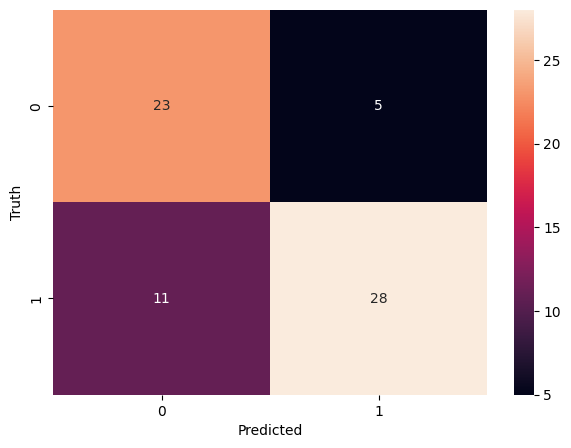

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.68      0.82      0.74        28
        male       0.85      0.72      0.78        39

    accuracy                           0.76        67
   macro avg       0.76      0.77      0.76        67
weighted avg       0.78      0.76      0.76        67

